In [1]:
# Import libraries
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Select random seed
np.random.seed(42)

In [2]:
# Load in MNIST dataset from keras
from tensorflow.keras.datasets import mnist
(X_train_origin, y_train), (X_test_origin, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Get the number of classes
n_class = len(np.unique(np.array(y_train)))
print(n_class)

10


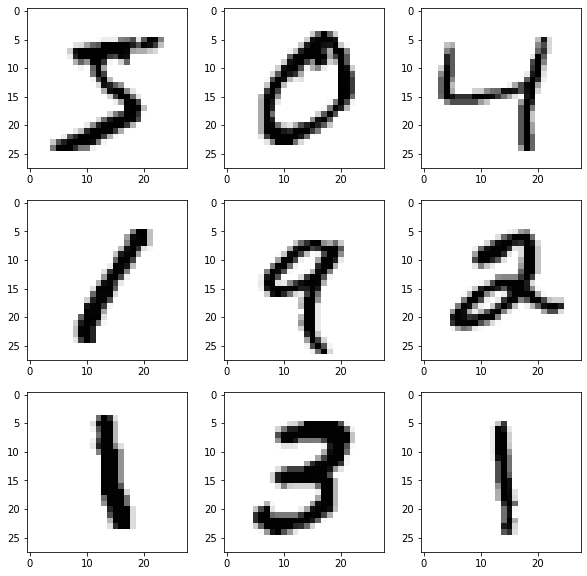

In [4]:
# Show some examples of the mnist dataset
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train_origin[i], cmap=plt.cm.binary)
plt.show()

In [5]:
# Shape of taining data
print('training input shape', X_train_origin.shape)
print('training output shape', y_train.shape)

# Shape of testing data
print('testing input shape', X_test_origin.shape)
print('testing output shape', y_test.shape)

training input shape (60000, 28, 28)
training output shape (60000,)
testing input shape (10000, 28, 28)
testing output shape (10000,)


In [6]:
# Scale pixels of images from 0 to 1
X_train = X_train_origin / 255.0
X_test  = X_test_origin  / 255.0

In [7]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(n_class, activation='softmax'))

In [8]:
# Get summary about the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
# Fit the model
history = model.fit(X_train, y_train, 
                    validation_split = 0.15,
                    epochs = 10)

Epoch 1/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3283 - accuracy: 0.9050 - val_loss: 0.1382 - val_accuracy: 0.9612
Epoch 2/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.1567 - accuracy: 0.9538 - val_loss: 0.1074 - val_accuracy: 0.9690
Epoch 3/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.1173 - accuracy: 0.9655 - val_loss: 0.0895 - val_accuracy: 0.9749
Epoch 4/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.0954 - accuracy: 0.9706 - val_loss: 0.0813 - val_accuracy: 0.9777
Epoch 5/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.0782 - accuracy: 0.9757 - val_loss: 0.0799 - val_accuracy: 0.9782
Epoch 6/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.0795 - val_accuracy: 0.9778
Epoch 7/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 0.0759 - val_accuracy:

In [11]:
# Evaluate your model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9929
[0.026701396331191063, 0.9928833246231079]
313/313 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9795
[0.06833208352327347, 0.9794999957084656]


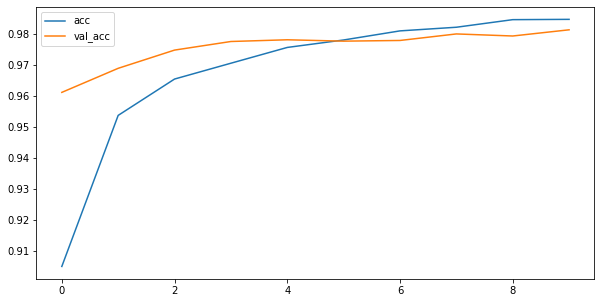

In [12]:
# Plot the training vs. validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

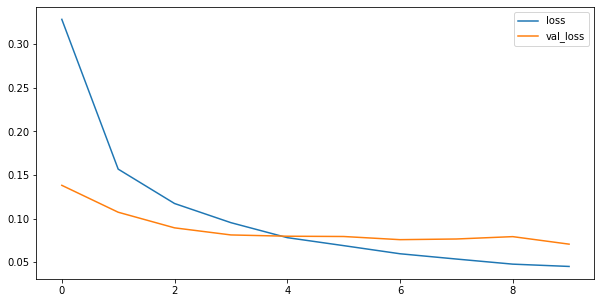

In [13]:
# Plot the training vs. validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
# Predictions
pred_test = model.predict(X_test).argmax(axis=1)
pred_test

array([7, 2, 1, ..., 4, 5, 6])

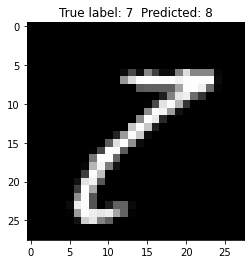

In [15]:
# Show misclassified examples
misclassified_indx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_indx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label: %s  Predicted: %s' %(y_test[i], pred_test[i]))
plt.show()

Confusion matrix, without normalization
[[ 971    0    1    2    1    1    1    1    2    0]
 [   0 1128    3    1    0    1    1    0    1    0]
 [   4    2 1012    2    1    0    2    4    5    0]
 [   3    0    6  987    0    6    0    4    3    1]
 [   0    0    3    0  958    0    5    2    3   11]
 [   2    0    0    5    3  867    6    2    4    3]
 [   7    3    2    1    2    2  938    0    3    0]
 [   1    6   10    1    3    0    0 1000    3    4]
 [   3    1    2    2    4    2    1    2  954    3]
 [   2    3    0    0   14    3    0    4    3  980]] 



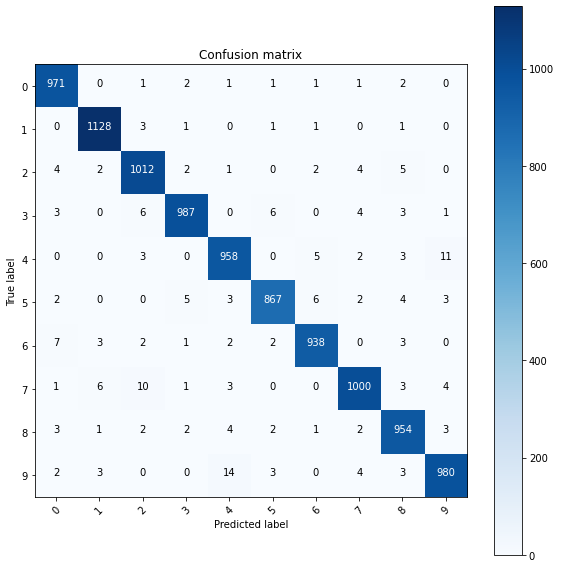

In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm, '\n')
    
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#----------------------------------------------------------------

cm = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 